In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import time
import os
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

In [2]:
ba_reviews_en = pd.read_csv('../generated/ba_reviews_experts_en.csv')

In [3]:
rb_reviews_en = pd.read_csv('../generated/rb_reviews_experts_en.csv')

# BeerAdvocate

In [4]:
analyzer = SentimentIntensityAnalyzer()

# Function to analyze sentiment and classify it directly
def analyze_and_classify_sentiment(text):
    scores = analyzer.polarity_scores(text)  # Get sentiment scores
    compound_score = scores['compound']
    if compound_score >= 0.05:
        sentiment_label = "positive"
    elif compound_score <= -0.05:
        sentiment_label = "negative"
    else:
        sentiment_label = "neutral"
    return scores, sentiment_label

# Analyze sentiment and classify it directly
sentiment_results = ba_reviews_en["text"].apply(analyze_and_classify_sentiment)
ba_reviews_en["sentiment_scores"] = sentiment_results.apply(lambda x: x[0])  
ba_reviews_en["sentiment_label"] = sentiment_results.apply(lambda x: x[1])

ba_reviews_en.head()


,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,aroma,palate,taste,overall,rating,text,language,sentiment_scores,sentiment_label
0,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,2009-02-20 11:00:00,StJamesGate,stjamesgate.163714,3.0,3.50,3.5,4.0,3.50,3.67,Pours pale copper with a thin head that quickl...,en,"{'neg': 0.0, 'neu': 0.902, 'pos': 0.098, 'comp...",positive
1,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,2006-03-13 11:00:00,mdagnew,mdagnew.19527,4.0,3.50,3.5,4.0,3.50,3.73,"500ml Bottle bought from The Vintage, Antrim.....",en,"{'neg': 0.0, 'neu': 0.762, 'pos': 0.238, 'comp...",positive
2,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,2004-08-30 10:00:00,cypressbob,cypressbob.3708,4.0,4.00,4.0,4.0,4.00,4.00,"500ml bottlePours with a light, slightly hazy ...",en,"{'neg': 0.0, 'neu': 0.723, 'pos': 0.277, 'comp...",positive
3,Legbiter,19827,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.8,2013-01-09 11:00:00,AgentMunky,agentmunky.409755,4.0,3.75,3.5,3.5,3.75,3.64,Poured from a 12 ounce bottle into a pilsner g...,en,"{'neg': 0.067, 'neu': 0.779, 'pos': 0.154, 'co...",positive
4,Legbiter,19827,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.8,2012-07-14 10:00:00,OtherShoe2,othershoe2.233642,4.0,3.50,4.0,3.5,4.00,3.68,Pours a rich brownish red with some chill haze...,en,"{'neg': 0.059, 'neu': 0.72, 'pos': 0.221, 'com...",positive


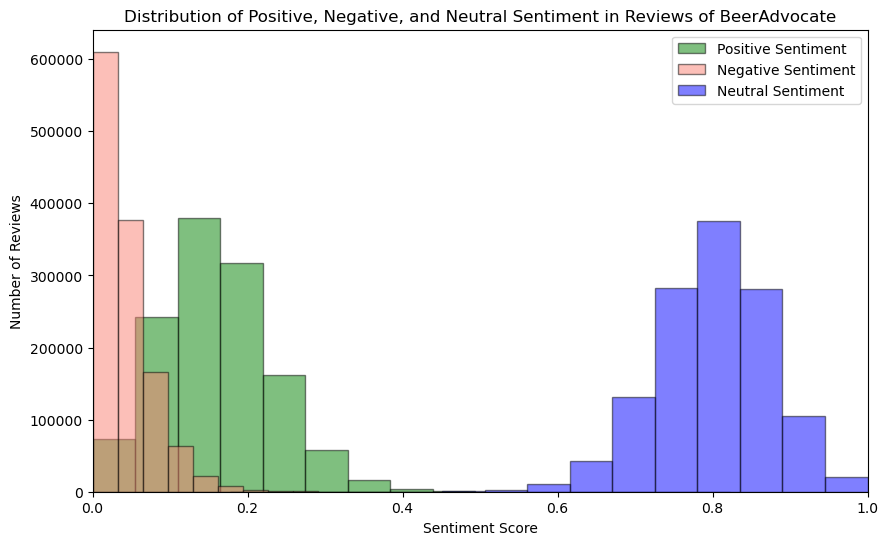

In [7]:
ba_reviews_en["positive_sentiment"] = ba_reviews_en["sentiment_scores"].apply(eval).apply(lambda x: x['pos'])
ba_reviews_en["negative_sentiment"] = ba_reviews_en["sentiment_scores"].apply(eval).apply(lambda x: x['neg'])
ba_reviews_en["neutral_sentiment"] = ba_reviews_en["sentiment_scores"].apply(eval).apply(lambda x: x['neu'])

# Plot the histograms on the same graph
plt.figure(figsize=(10, 6))
plt.hist(
    ba_reviews_en["positive_sentiment"], bins=15, alpha=0.5, edgecolor='black', label="Positive Sentiment", color='green'
)
plt.hist(
    ba_reviews_en["negative_sentiment"], bins=15, alpha=0.5, edgecolor='black', label="Negative Sentiment", color='salmon'
)
plt.hist(
    ba_reviews_en["neutral_sentiment"], bins=15, alpha=0.5, edgecolor='black', label="Neutral Sentiment", color='blue'
)
plt.xlim([0, 1])
plt.xlabel("Sentiment Score")
plt.ylabel("Number of Reviews")
plt.title("Distribution of Positive, Negative, and Neutral Sentiment in Reviews of BeerAdvocate")
plt.legend()
plt.show()

Negative Sentiment (Red):
The majority of negative sentiment scores are heavily concentrated near 0.0. This indicates that most reviews on BeerAdvocate have very little negative sentiment, with only a small portion registering as somewhat negative (scores between ~0.05 and 0.1). The spike at 0.0 suggests that users tend not to leave explicitly negative reviews.

Positive Sentiment (Green):
Positive sentiment scores are spread out primarily between 0.1 and 0.3, with peaks at around 0.1–0.2.
This suggests that many reviews show mildly positive sentiment, but strong positivity is less common (no significant scores above ~0.3). Compared to negative sentiment, the distribution of positive sentiment is broader and more significant in volume.

Neutral Sentiment (Blue):
Neutral sentiment scores are significantly higher than both positive and negative scores.The distribution clusters tightly between 0.6 and 0.9, indicating that a large number of reviews are identified as neutral.
The dominance of the blue bars highlights that reviews on BeerAdvocate are often written in a balanced, factual, or moderate tone.

Neutral sentiment reviews dominate in frequency, similar to the earlier RateBeer analysis.
Negative sentiment reviews (red) have the highest count at 0.0, reinforcing that strongly negative emotions are rare.
Positive sentiment reviews are lower in frequency but wider in distribution compared to negative ones.

Comparison to the RateBeer Graph:
Negative Sentiment:
Both platforms show a concentration of negative sentiment near 0.0.
However, BeerAdvocate shows a slightly broader range of low negative sentiment compared to RateBeer.
Positive Sentiment:
The positive sentiment distribution on BeerAdvocate appears more prominent than on RateBeer, suggesting users on BeerAdvocate express slightly more positive tones.
Neutral sentiment scores dominate on both platforms, clustering tightly in the range of 0.6–0.9.

Overall Analysis:
Reviews on BeerAdvocate lean toward neutral or mildly positive sentiment, with very few reviews being strongly negative.
The data highlights a trend of cautious or balanced expression, where users prefer to focus on constructive feedback rather than harsh negativity.
Compared to RateBeer, BeerAdvocate seems to display slightly more pronounced positive sentiment while retaining a similar trend of neutral dominance.

In [6]:
ba_reviews_en["sentiment_scores"] = ba_reviews_en["sentiment_scores"].astype(str)

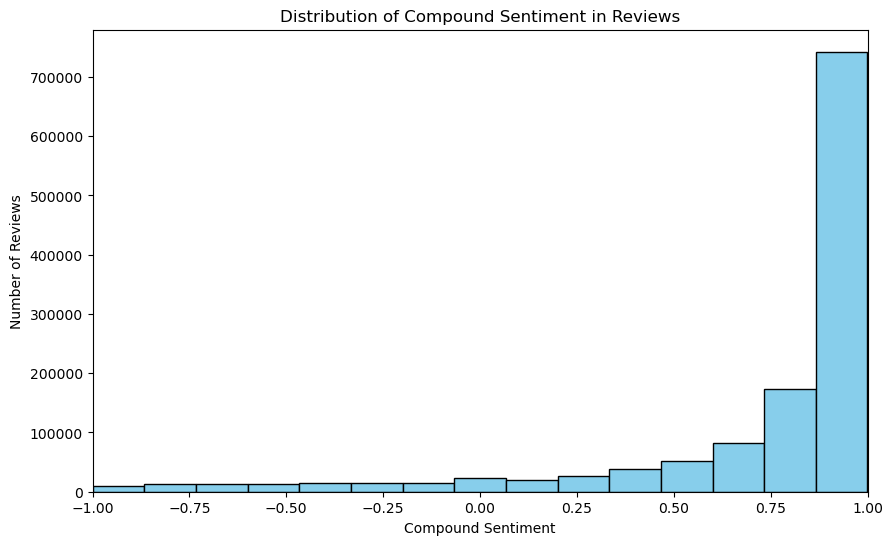

In [8]:
ba_reviews_en["compound_sentiment"] = ba_reviews_en["sentiment_scores"].apply(eval).apply(lambda x: x['compound'])

# Step 3: Plot the histogram of compound sentiment scores
plt.figure(figsize=(10, 6))
plt.hist(ba_reviews_en["compound_sentiment"], bins=15, edgecolor='black', color='skyblue')
plt.xlim([-1, 1])  # Compound scores range from -1 to 1
plt.xlabel("Compound Sentiment")
plt.ylabel("Number of Reviews")
plt.title("Distribution of Compound Sentiment in Reviews")
plt.show()

                   count  percentage
sentiment_label                     
positive         1138463       91.03
negative           94346        7.54
neutral            17865        1.43


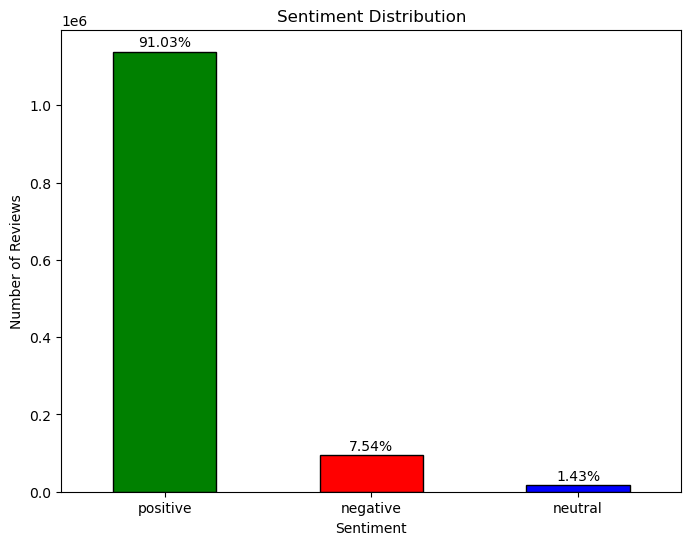

In [9]:
sentiment_counts = ba_reviews_en["sentiment_label"].value_counts()
total_reviews = sentiment_counts.sum()
sentiment_percentages = (sentiment_counts / total_reviews * 100).round(2)

sentiment_analysis = pd.DataFrame({
    "count": sentiment_counts,
    "percentage": sentiment_percentages
})

print(sentiment_analysis)

plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind="bar", color=["green", "red", "blue"], edgecolor="black")
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=0)

for index, value in enumerate(sentiment_counts):
    percentage = sentiment_percentages.iloc[index]
    plt.text(index, value + total_reviews * 0.01, f"{percentage}%", ha="center", fontsize=10)

plt.show()

91.03% of reviews are classified as positive.
This overwhelming majority indicates that users tend to express favorable or appreciative opinions in their reviews.
The dominance of positive sentiment aligns with common patterns observed in online review platforms, where users are more likely to share positive experiences.
7.54% of reviews are classified as negative.
The low percentage of negative sentiment highlights that users seldom express strong criticism.
This could reflect platform culture or reviewer behavior, where negative feedback is minimized.
Only 1.43% of reviews are classified as neutral.
The minimal proportion of neutral sentiment suggests that reviews on this platform are typically opinionated (leaning towards positive or negative), with fewer instances of balanced or neutral language.

The chart highlights a strong positive sentiment bias among reviews, with minimal neutral content and limited negative feedback. This chart focuses on overall sentiment classification (positive/negative/neutral), unlike previous histograms that explored sentiment scores more granularly.

# RateBeer

In [10]:
analyzer = SentimentIntensityAnalyzer()

# Function to analyze sentiment and classify it directly
def analyze_and_classify_sentiment(text):
    scores = analyzer.polarity_scores(text)  # Get sentiment scores
    compound_score = scores['compound']
    if compound_score >= 0.05:
        sentiment_label = "positive"
    elif compound_score <= -0.05:
        sentiment_label = "negative"
    else:
        sentiment_label = "neutral"
    return scores, sentiment_label

# Analyze sentiment and classify it directly
sentiment_results = rb_reviews_en["text"].apply(analyze_and_classify_sentiment)
rb_reviews_en["sentiment_scores"] = sentiment_results.apply(lambda x: x[0])  
rb_reviews_en["sentiment_label"] = sentiment_results.apply(lambda x: x[1])

rb_reviews_en.head()

,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,aroma,palate,taste,overall,rating,text,language,sentiment_scores,sentiment_label
0,Castel Beer (Gabon),105273,Sobraga,3198,Pale Lager,5.2,2015-10-23 10:00:00,kevnic2008,122778,2,4,2,4,7,1.9,Many thanks for this beer to Erzengel. Pours l...,en,"{'neg': 0.078, 'neu': 0.704, 'pos': 0.219, 'co...",positive
1,Castel Beer (Gabon),105273,Sobraga,3198,Pale Lager,5.2,2015-10-12 10:00:00,Beerhunter111,227834,2,3,2,3,9,1.9,Many thanks to Erzengel for sharing! Pours cle...,en,"{'neg': 0.0, 'neu': 0.692, 'pos': 0.308, 'comp...",positive
2,Castel Beer (Gabon),105273,Sobraga,3198,Pale Lager,5.2,2015-10-07 10:00:00,Erzengel,83106,4,5,4,5,8,2.6,Many thanks to Travlr for this can! Grainy no...,en,"{'neg': 0.232, 'neu': 0.589, 'pos': 0.179, 'co...",negative
3,Castel Beer (Gabon),105273,Sobraga,3198,Pale Lager,5.2,2014-05-29 10:00:00,Lowenbrau,37316,3,5,2,3,7,2.0,"330ml bottle. 29-05-2014.From Gabon, courtesy ...",en,"{'neg': 0.16, 'neu': 0.551, 'pos': 0.289, 'com...",positive
4,Castel Beer (Gabon),105273,Sobraga,3198,Pale Lager,5.2,2009-06-18 10:00:00,Cletus,17111,4,4,2,4,8,2.2,Pours yellow with a large white head. Smells ...,en,"{'neg': 0.0, 'neu': 0.831, 'pos': 0.169, 'comp...",positive


In [11]:
rb_reviews_en["sentiment_scores"] = rb_reviews_en["sentiment_scores"].astype(str)

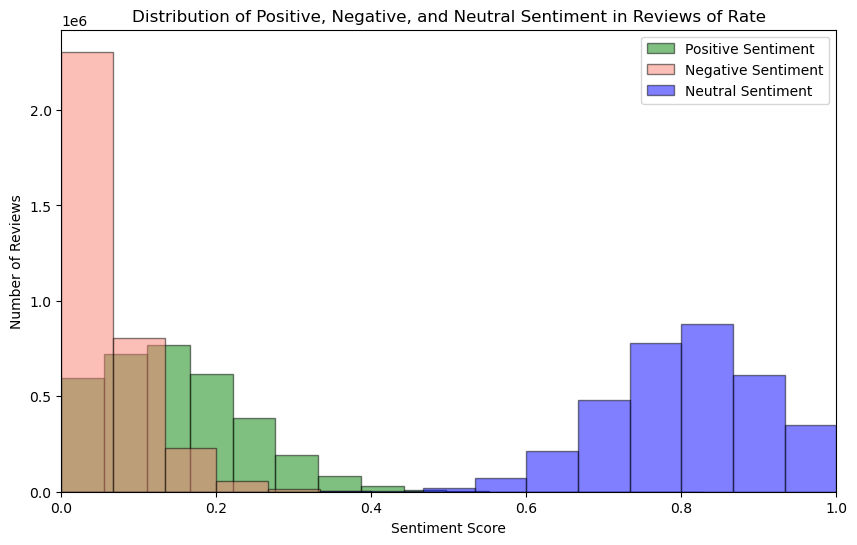

In [12]:
rb_reviews_en["positive_sentiment"] = rb_reviews_en["sentiment_scores"].apply(eval).apply(lambda x: x['pos'])
rb_reviews_en["negative_sentiment"] = rb_reviews_en["sentiment_scores"].apply(eval).apply(lambda x: x['neg'])
rb_reviews_en["neutral_sentiment"] = rb_reviews_en["sentiment_scores"].apply(eval).apply(lambda x: x['neu'])

# Plot the histograms on the same graph
plt.figure(figsize=(10, 6))
plt.hist(
    rb_reviews_en["positive_sentiment"], bins=15, alpha=0.5, edgecolor='black', label="Positive Sentiment", color='green'
)
plt.hist(
    rb_reviews_en["negative_sentiment"], bins=15, alpha=0.5, edgecolor='black', label="Negative Sentiment", color='salmon'
)
plt.hist(
    rb_reviews_en["neutral_sentiment"], bins=15, alpha=0.5, edgecolor='black', label="Neutral Sentiment", color='blue'
)
plt.xlim([0, 1])
plt.xlabel("Sentiment Score")
plt.ylabel("Number of Reviews")
plt.title("Distribution of Positive, Negative, and Neutral Sentiment in Reviews of Rate")
plt.legend()
plt.show()

Negative Sentiment (Red):

The negative sentiment scores are concentrated close to 0.
The vast majority of reviews have a very low negative score (close to 0.0), meaning that most reviews are not highly negative.
This suggests that truly negative reviews are rare, as indicated by the large spike at the lower end.

Positive Sentiment (Green):
Positive sentiment scores are spread mostly between 0.1 and 0.3, with some occurring slightly higher.
There is a noticeable concentration in the low positive range (e.g., 0.1–0.2), but the distribution extends further compared to the negative scores.
This indicates that many reviews have some positive sentiment but are not extremely enthusiastic.

Neutral Sentiment (Blue):
The neutral sentiment scores are clearly higher than both positive and negative scores.
Most of the neutral sentiment values cluster between 0.6 and 0.9, showing that many reviews are perceived as "neutral" or have a moderate sentiment.
This likely reflects reviews with balanced or ambiguous tones.

Neutral sentiment reviews dominate in terms of frequency, as seen from the height of the blue bars.
Negative sentiment reviews have the highest count at low values (near 0) but drop quickly.
Positive sentiment reviews are more evenly spread but lower in count than neutral reviews.

Overall Analysis:
Most reviews on RateBeer appear neutral or only mildly positive.
Negative sentiment is extremely low for most reviews, suggesting users rarely express strong negativity.
The imbalance between neutral and other sentiment types (positive or negative) might indicate that users often post factual or unenthusiastic reviews rather than strongly emotional ones.

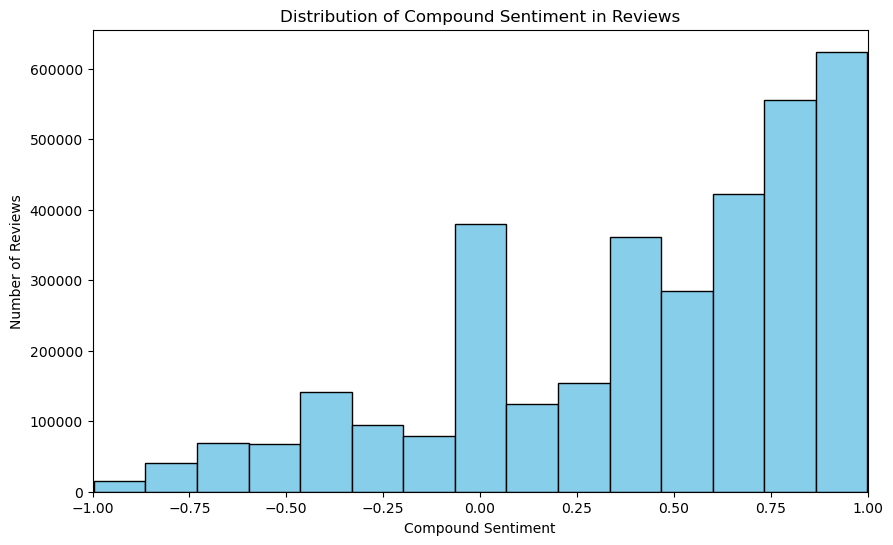

In [13]:
rb_reviews_en["compound_sentiment"] = rb_reviews_en["sentiment_scores"].apply(eval).apply(lambda x: x['compound'])

plt.figure(figsize=(10, 6))
plt.hist(rb_reviews_en["compound_sentiment"], bins=15, edgecolor='black', color='skyblue')
plt.xlim([-1, 1])  # Compound scores range from -1 to 1
plt.xlabel("Compound Sentiment")
plt.ylabel("Number of Reviews")
plt.title("Distribution of Compound Sentiment in Reviews")
plt.show()

                   count  percentage
sentiment_label                     
positive         2570389       75.31
negative          530411       15.54
neutral           312168        9.15


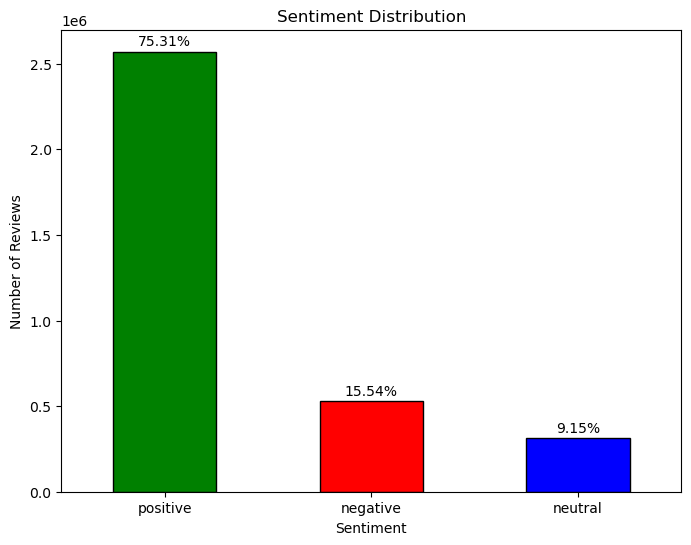

In [14]:
sentiment_counts = rb_reviews_en["sentiment_label"].value_counts()
total_reviews = sentiment_counts.sum()
sentiment_percentages = (sentiment_counts / total_reviews * 100).round(2)

sentiment_analysis = pd.DataFrame({
    "count": sentiment_counts,
    "percentage": sentiment_percentages
})

print(sentiment_analysis)

plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind="bar", color=["green", "red", "blue"], edgecolor="black")
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=0)

for index, value in enumerate(sentiment_counts):
    percentage = sentiment_percentages.iloc[index]
    plt.text(index, value + total_reviews * 0.01, f"{percentage}%", ha="center", fontsize=10)

plt.show()

Positive Sentiment (Green):
75.31% of reviews are classified as positive.
While still the majority, this proportion is lower compared to the previous chart where positive sentiment was over 90%.This suggests a more balanced sentiment distribution, with relatively higher negative and neutral feedback.

Negative Sentiment (Red):
15.54% of reviews are classified as negative. This is significantly higher compared to the previous chart (7.54%), indicating that users on this platform (or dataset) are more critical and willing to share negative feedback.The larger proportion of negative sentiment reflects a more honest or critical tone in reviews.

Neutral Sentiment (Blue):
9.15% of reviews are classified as neutral.
This is a notable increase from the earlier chart (1.43%), showing a higher presence of balanced or factual reviews.Neutral reviews may indicate a mix of positive and negative points without leaning heavily in either direction

This chart reveals a more balanced sentiment distribution compared to the earlier dataset. While positive sentiment still dominates, the higher proportions of negative and neutral reviews indicate a user base that is more expressive and critical in their feedback. 

# Comparison between both

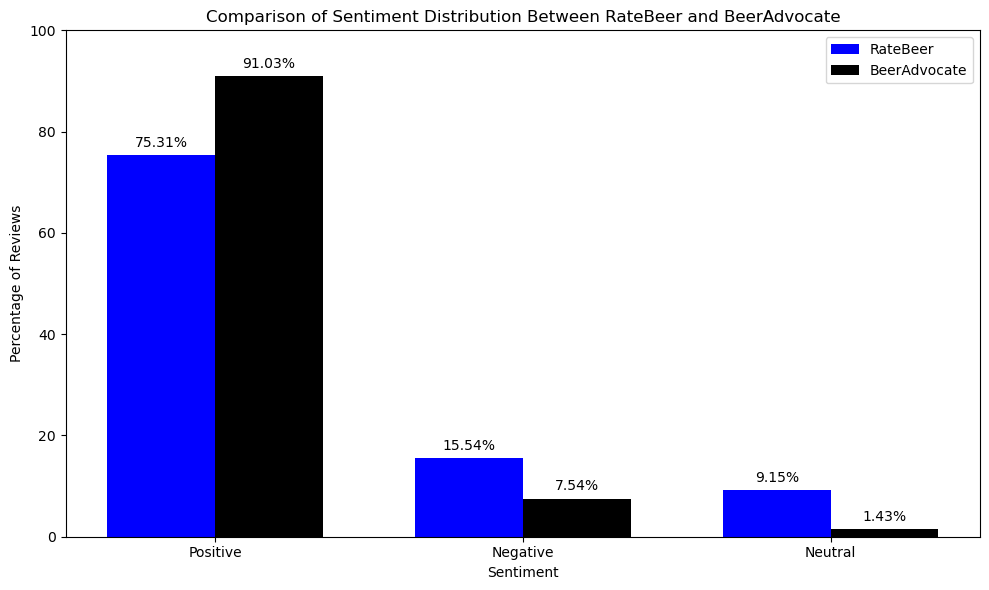

In [17]:
def calculate_sentiment_distribution(df):
    sentiment_counts = df["sentiment_label"].value_counts(normalize=True) * 100
    return {
        "positive": sentiment_counts.get("positive", 0),
        "negative": sentiment_counts.get("negative", 0),
        "neutral": sentiment_counts.get("neutral", 0),
    }

ratebeer_distribution = calculate_sentiment_distribution(rb_reviews_en)
beeradvocate_distribution = calculate_sentiment_distribution(ba_reviews_en)

platforms = ["Positive", "Negative", "Neutral"]
ratebeer_values = [ratebeer_distribution["positive"], ratebeer_distribution["negative"], ratebeer_distribution["neutral"]]
beeradvocate_values = [beeradvocate_distribution["positive"], beeradvocate_distribution["negative"], beeradvocate_distribution["neutral"]]

x = np.arange(len(platforms))  # X-axis positions
width = 0.35  # Width of the bars

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, ratebeer_values, width, label='RateBeer', color='blue')
plt.bar(x + width/2, beeradvocate_values, width, label='BeerAdvocate', color='black')

plt.xlabel("Sentiment")
plt.ylabel("Percentage of Reviews")
plt.title("Comparison of Sentiment Distribution Between RateBeer and BeerAdvocate")
plt.xticks(x, platforms)  # Set x-axis labels
plt.ylim(0, 100)  # Limit y-axis to 100%
plt.legend()

for i, (rb_val, ba_val) in enumerate(zip(ratebeer_values, beeradvocate_values)):
    plt.text(i - width/2, rb_val + 1, f"{rb_val:.2f}%", ha='center', va='bottom', fontsize=10, color='black')
    plt.text(i + width/2, ba_val + 1, f"{ba_val:.2f}%", ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()